<a href="https://colab.research.google.com/github/Shital3010/decision-tree-on-iris-dataset/blob/master/Copy_of_decision_tree_on_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision tree algorithm on iris dataset

In [ ]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('Iris.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 6)

In [ ]:
dt=data.drop(['Id'],axis=1)
dt.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dt.shape

(150, 5)

In [ ]:
dt_num = dt.select_dtypes(include = ['float64', 'int64'])     ## print the numerical values in the data
dt_num.head()   #df_not_num = df.select_dtypes(include = ['O'])             
print('There is {} numerical features including:\n{}'.format(len(dt_num.columns), dt_num.columns.tolist()))

There is 4 numerical features including:
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [ ]:
dt_not_num = dt.select_dtypes(include = ['O'])             ##print the non numerical values in the data
print('There is {} non numerical features including:\n{}'.format(len(dt_not_num.columns), dt_not_num.columns.tolist()))

There is 1 non numerical features including:
['Species']


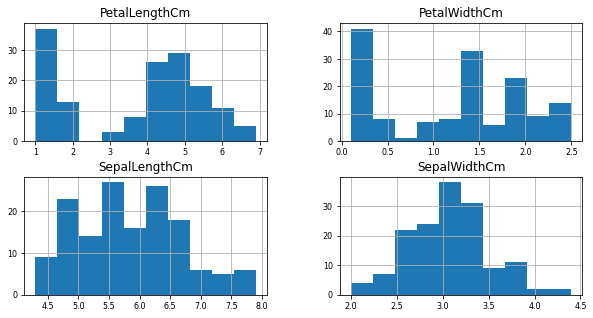

In [ ]:
dt_num.hist(figsize=(10,5),xlabelsize=8, ylabelsize=8);

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


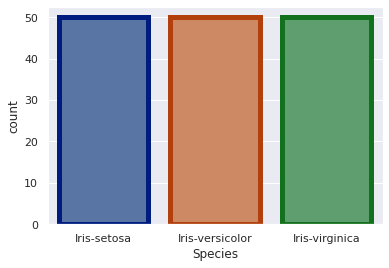

In [ ]:
import seaborn as sns
sns.set (style= "darkgrid",color_codes=True)
sns.countplot(x='Species',data=dt,linewidth=5, edgecolor=sns.color_palette("dark", 3))
plt.show()

In [ ]:
dt.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Text(0.5, 1.0, 'Barplot of Species vs Sepal Length in cm')

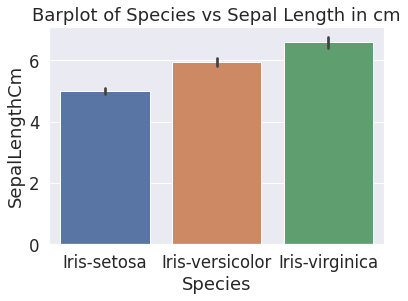

In [ ]:
sns.set (style='darkgrid',font_scale=1.5,color_codes=True)
sns.barplot(x= "Species", y= "SepalLengthCm" , data = dt)
plt.title('Barplot of Species vs Sepal Length in cm')

Text(0.5, 1.0, 'Barplot of Species vs Sepal Width in cm')

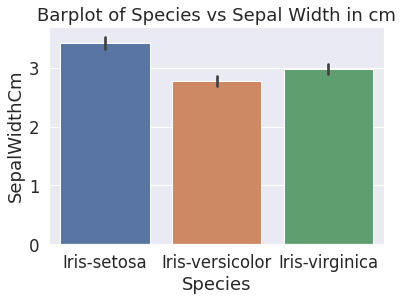

In [ ]:
sns.set (style='darkgrid',font_scale=1.5,color_codes=True)
sns.barplot(x= "Species", y= "SepalWidthCm" , data = dt)
plt.title('Barplot of Species vs Sepal Width in cm')

Text(0.5, 1.0, 'Barplot of Species vs Petal Length in cm')

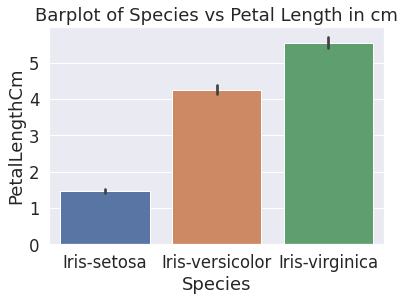

In [ ]:
sns.set (style='darkgrid',font_scale=1.5,color_codes=True)
sns.barplot(x= "Species", y= "PetalLengthCm" , data = dt)
plt.title('Barplot of Species vs Petal Length in cm')

Text(0.5, 1.0, 'barplot of Species vs Petal Width in cm')

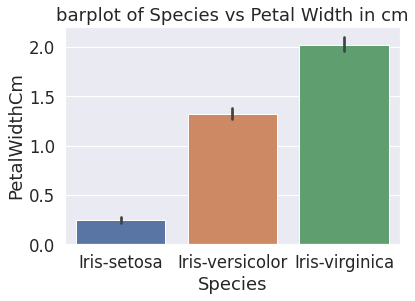

In [ ]:
sns.set (style='darkgrid',font_scale=1.5,color_codes=True)
sns.barplot(x= "Species", y= "PetalWidthCm" , data = dt)
plt.title('barplot of Species vs Petal Width in cm')

In [ ]:
cols=['Species']

for col in cols:
    dt[col]=dt[col].astype("category")
   
print (dt.dtypes)

SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object


In [ ]:
#to extract the feature variable
x=dt.iloc[:,:-1].values
#to extract the target variable
y=dt.iloc[:,4].values

In [ ]:
##to encode categorical var into numerical the species variable (target variable)
from sklearn.preprocessing import LabelEncoder  
label_encoder_y= LabelEncoder()

In [ ]:
y= label_encoder_y.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=89) 

#Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler  
st_x= StandardScaler()  

x_train= st_x.fit_transform(x_train) 

x_test= st_x.transform(x_test) 

#Build decision model

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

## Evaluating the model

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 16]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.90      0.95        10
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
print("Accuracy on training set :",format(clf.score(x_train,y_train)))
print("Accuracy on test set :",format(clf.score(x_test,y_test)))

Accuracy on training set : 1.0
Accuracy on test set : 0.9777777777777777


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


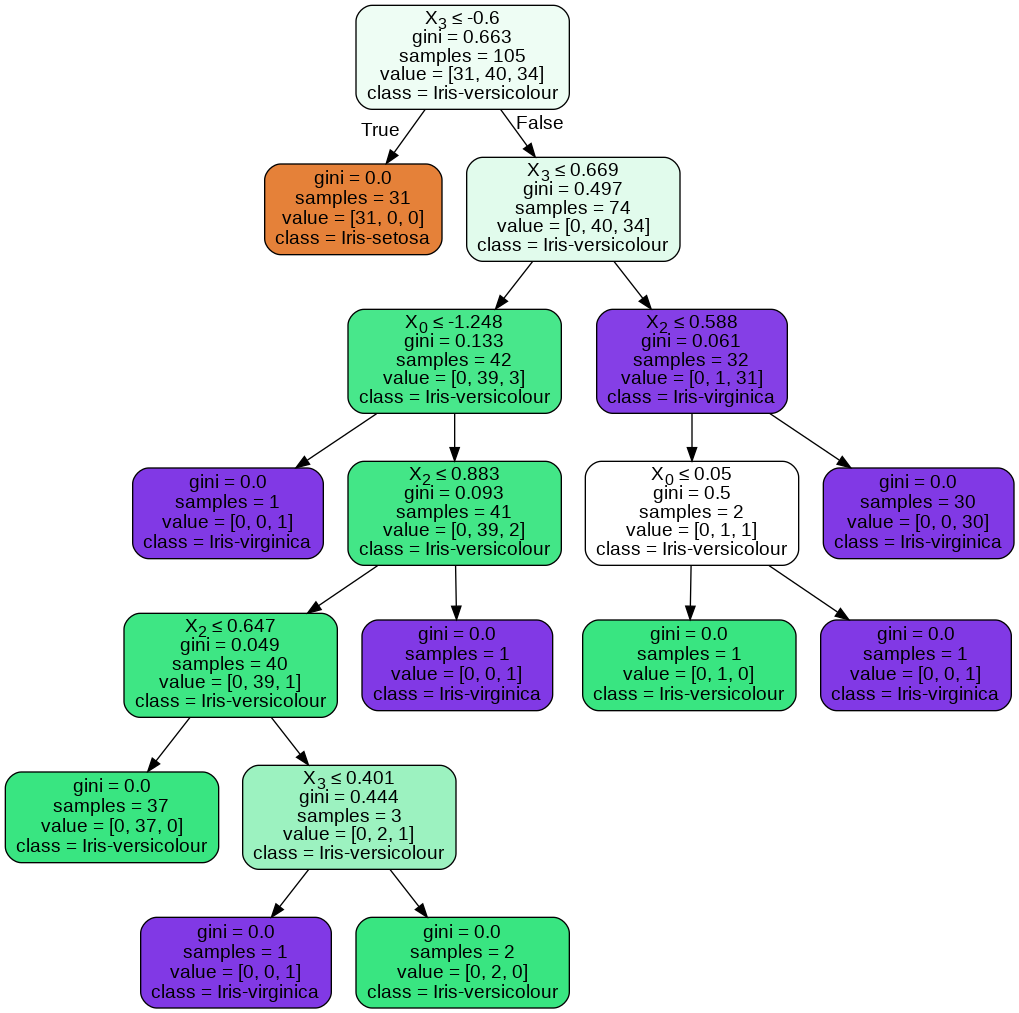

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,class_names= ['Iris-setosa','Iris-versicolour','Iris-virginica'],filled=True,rounded=True,special_characters=True, )
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
#Each branch represents the outcome of the test, and each leaf node represents a class label.


#The test set accuracy is 97.77% which means for any new data that comes, the model can predict the class with 97.77% accuracy